▶**TASK-1 : TITANIC SURVIVAL PREDICTION**





*IMPORTING IMPORTANT LIBRARIES*



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*IMPORTING DATASET*

In [5]:
df = pd.read_csv("tested.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
df.shape


(418, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


***From above cell it is clear there there are few missing values in age column***

In [7]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

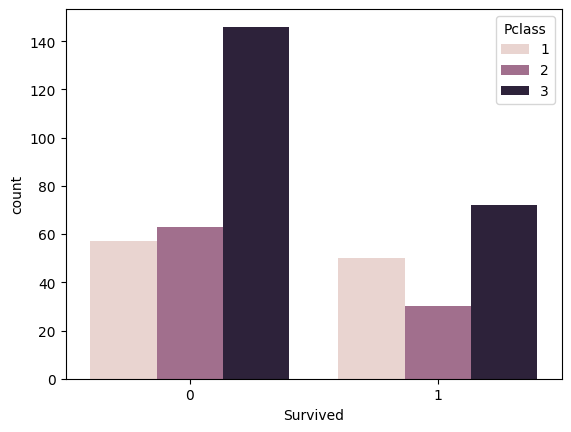

In [6]:
#let's visualize the count of survivals wrt pclass
sns.countplot(x=df['Survived'], hue=df['Pclass'])

In [7]:
df["Sex"]

0        male
1      female
2        male
3        male
4      female
        ...  
413      male
414    female
415      male
416      male
417      male
Name: Sex, Length: 418, dtype: object

<Axes: xlabel='Sex', ylabel='count'>

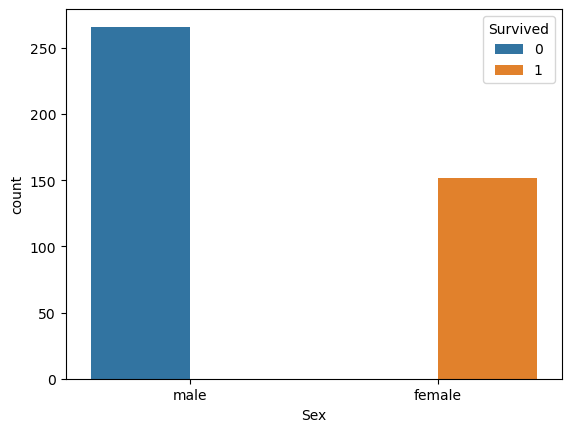

In [10]:
#let's visualize the count of survivals wrt Gender
sns.countplot(x=df['Sex'], hue=df['Survived'])

In [8]:
#Look at survival rate by sex
df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,1.0
male,0.0


In [9]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex']= labelencoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
df['Sex'], df['Survived']

(0      1
 1      0
 2      1
 3      1
 4      0
       ..
 413    1
 414    0
 415    1
 416    1
 417    1
 Name: Sex, Length: 418, dtype: int32,
 0      0
 1      1
 2      0
 3      0
 4      1
       ..
 413    0
 414    1
 415    0
 416    0
 417    0
 Name: Survived, Length: 418, dtype: int64)

<Axes: xlabel='Sex', ylabel='count'>

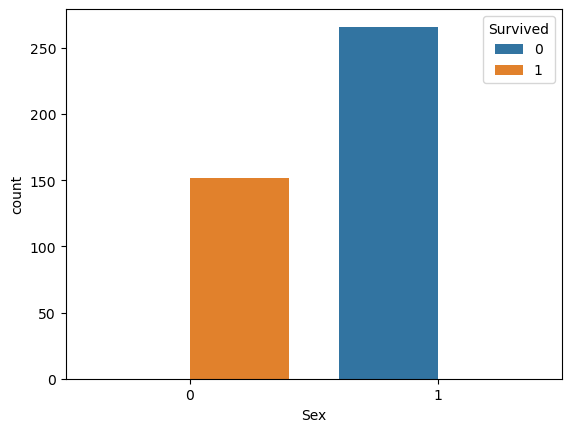

In [15]:
sns.countplot(x=df['Sex'], hue=df["Survived"])

In [16]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [12]:
# After dropping non required column
print(df.head())
df = df.drop(['Age'], axis=1)


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    1  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    0  47.0      1      0   
2                     Myles, Mr. Thomas Francis    1  62.0      0      0   
3                              Wirz, Mr. Albert    1  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [11]:
df_final = df
df_final.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S


*MODEL TRAINING*

In [13]:
X= df[['Pclass', 'Sex']]
Y=df['Survived']

In [14]:
X= df[['Pclass', 'Sex']]
Y=df['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

*MODEL PREDICTION*

In [22]:
pred = print(log.predict(X_test))


[0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 0 1 1 1
 1 0 0 1 0 1 0 1 0 0]


In [23]:
print(Y_test)

360    0
170    0
224    1
358    0
309    1
      ..
100    1
7      0
22     1
68     0
328    0
Name: Survived, Length: 84, dtype: int64


In [16]:
import warnings
warnings.filterwarnings("ignore")

res= log.predict([[2,1]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

So Sorry! Not Survived
